# Hierarchical clustering using IRIS dataset 

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. We will be classifying IRIS Dataset using heirarchical clustering.

The Fisher's Iris data set contains attributes of three Iris species, namely, Iris Setosa, Iris versicolor, and Iris virginica. Each species (class) consists of 50 samples, each having four features, Sepal length, Sepal width, Petal length and Petal width.

In [1]:
import numpy as np
import sklearn
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import pdist

In [2]:
# load csv into dataframe
df = pd.read_csv("iris.data", sep=',')
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal Width','Classes'] 
display(df)
data = df.to_numpy()
data.shape

,Sepal length,Sepal width,Petal length,Petal Width,Classes
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


(149, 5)

## Elbow Method

Elbow method is a heuristic used in determining the number of clusters in a data set. We will be plotting Sum of squared distances vs k graph, where k is the number of clusters. Then we choose the optimal value of k from the graph.

In [3]:
Sum_of_squared_distances = []
dt = data[:,0:4]

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dt)
    Sum_of_squared_distances.append(km.inertia_)

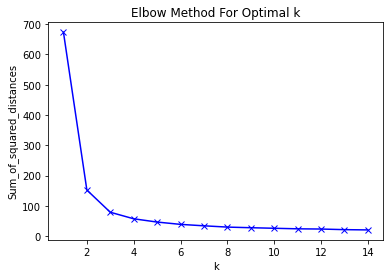

In [4]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Single Linkage

In agglomerative clustering process, the single linkage is the distance between the closest neighbouring points of the two cluster.

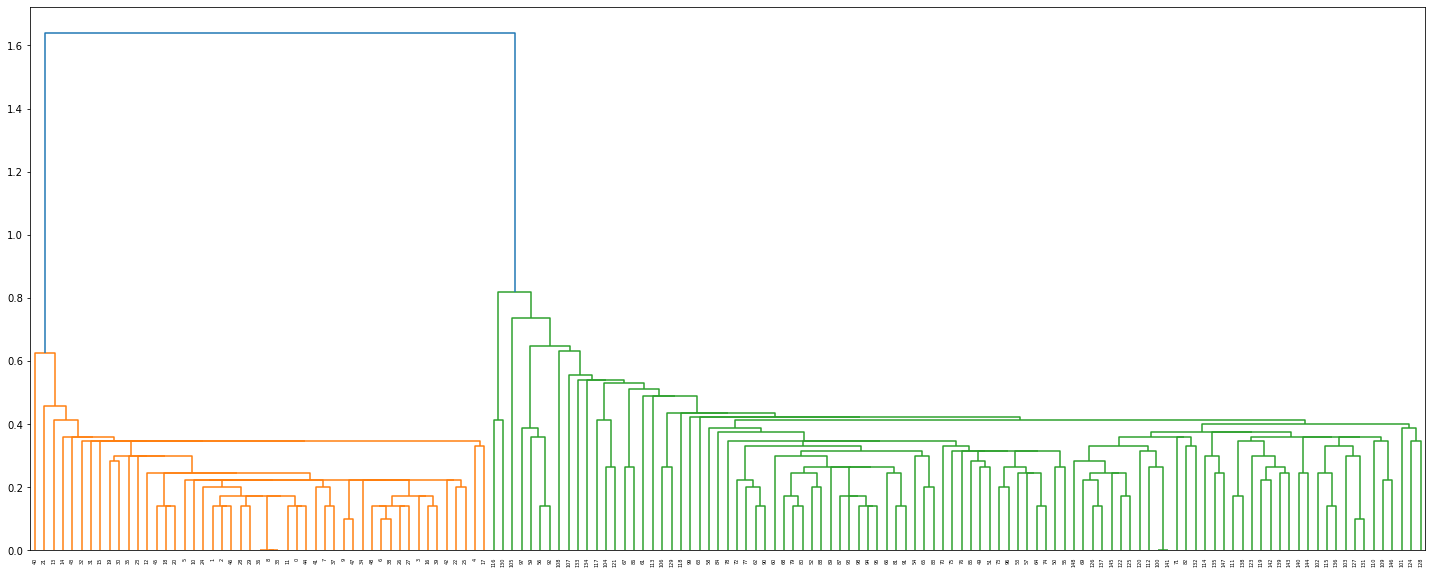

In [5]:
X = linkage(dt, 'single')
fig = plt.figure(figsize=(25, 10))
dn1 = dendrogram(X)
plt.show()

### Average Linkage

In Average linkage clustering, we take the average distance between all pair of object as the distance between the cluster.

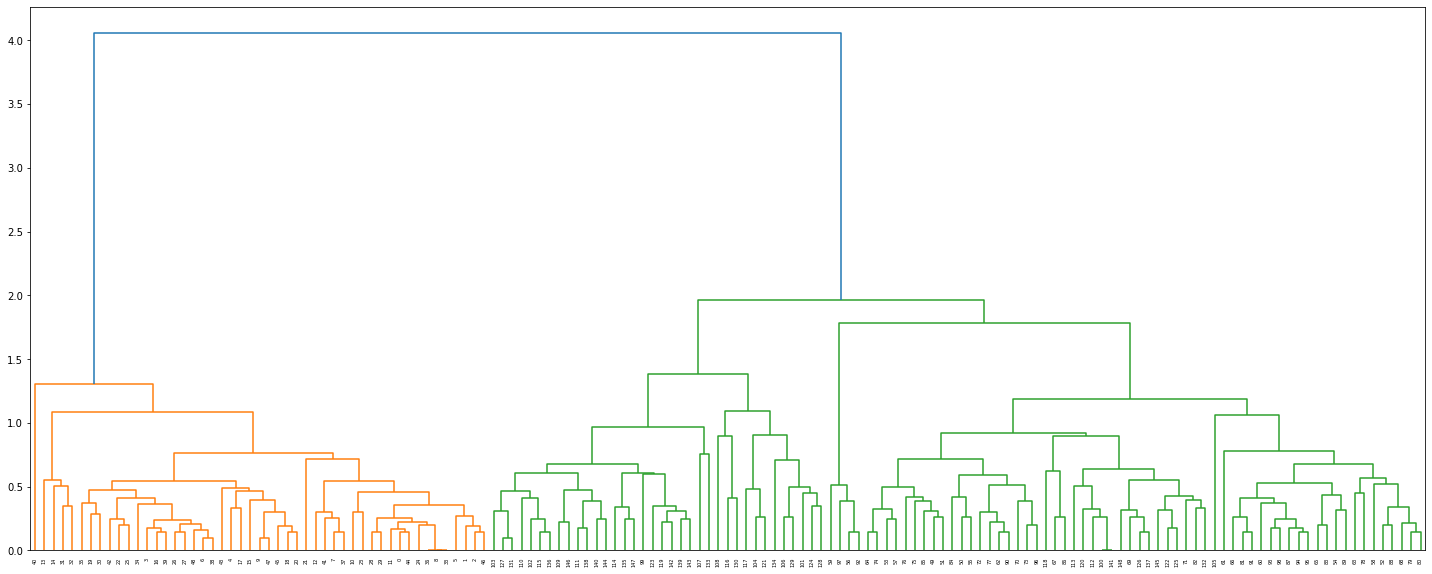

In [6]:
Y = linkage(dt, 'average')
fig = plt.figure(figsize=(25, 10))
dn2 = dendrogram(Y)
plt.show()

### Evaluate Dendogram

We will be evaluating dendogram based on cophenet distance. Cophenet distance is the intergroup dissimilarity at which the two observations are first combined into a single cluster.

In [7]:
cp1, coph_dists = cophenet(X, pdist(dt))
cp2, coph_dists = cophenet(Y, pdist(dt))

print("Cophenate Distance Single Linkage: ",cp1)
print("Cophenate Distance Average Linkage: ",cp2)

Cophenate Distance Single Linkage:  0.8628760740152926
Cophenate Distance Average Linkage:  0.8761327937004479


### Truncate Dendogram

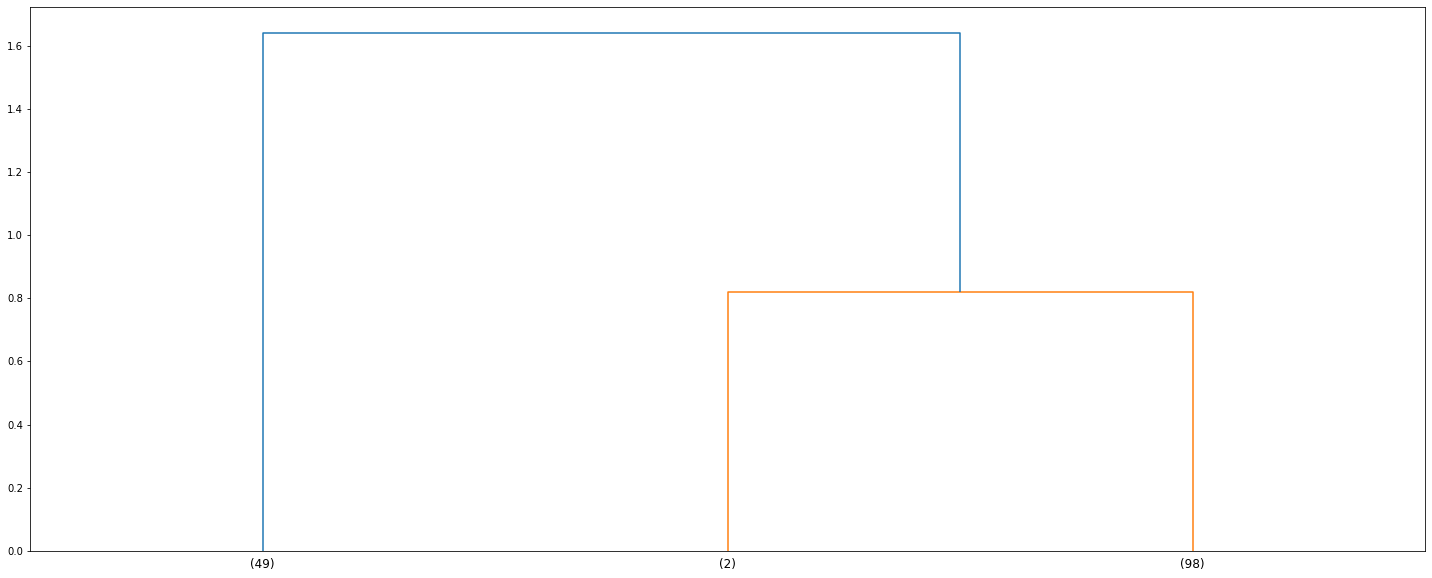

In [8]:
fig = plt.figure(figsize=(25, 10))
t_dn1 = dendrogram(X, truncate_mode='lastp',p=3)
plt.show()

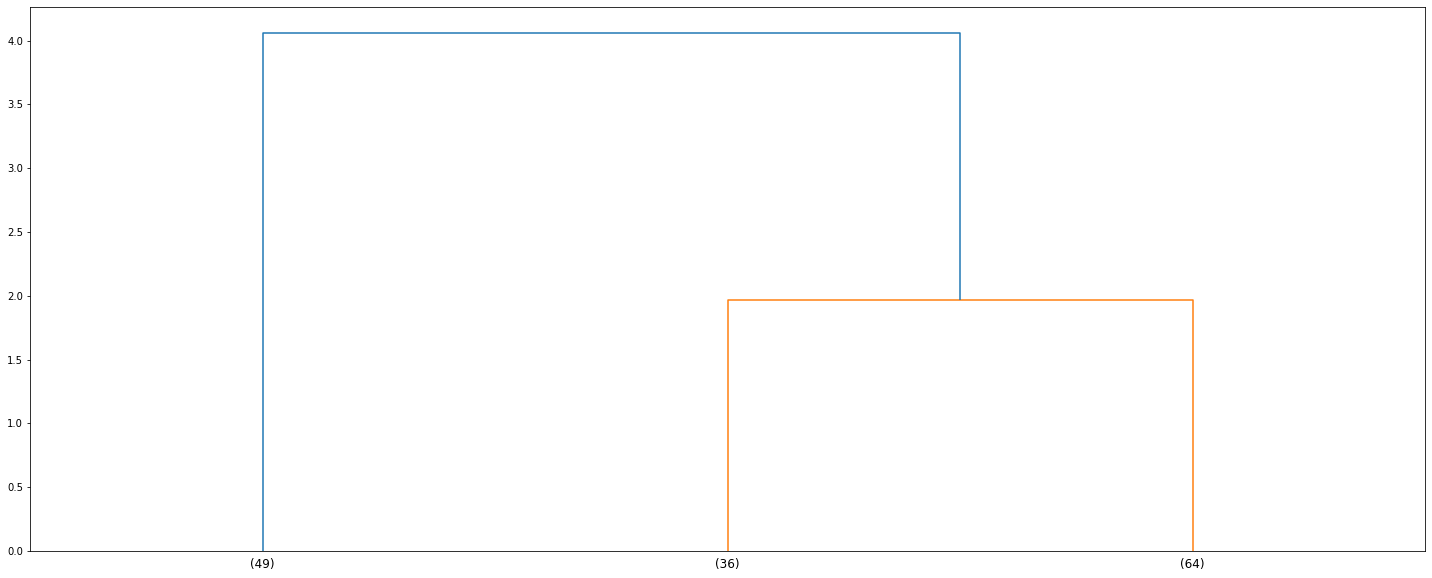

In [9]:
fig = plt.figure(figsize=(25, 10))
t_dn2 = dendrogram(Y, truncate_mode='lastp',p=3)
plt.show()

### Decide the criteria: distance-cutoff or number of clusters 

In [10]:
# setosa 1, versicolor 2, verginica 3.
true_label = np.array([1]*50 + [2]*50 + [3]*50)
true_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Classification Single Linkage

In [11]:
# no. of clusters taken as 3
predicted_label_single_no_cluster = fcluster(X, 3, criterion='maxclust')
predicted_label_single_no_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [12]:
# cluster labelling based on distance
predicted_label_single_distance = fcluster(X, t=0.7, criterion='distance')
predicted_label_single_distance

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Classification Average Linkage

In [13]:
# no. of clusters taken as 3
predicted_label_avg_no_cluster = fcluster(Y, 3, criterion='maxclust')
predicted_label_avg_no_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [14]:
# cluster labelling based on distance
predicted_label_avg_distance = fcluster(Y, t=1.8, criterion='distance')
predicted_label_avg_distance

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)